In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette("colorblind")
colorblind = sns.color_palette("colorblind")
deep = sns.color_palette("deep")

# font_path = "/sailhome/akchak/.fonts/AvenirLTStd-Roman.otf"
# 
# prop = fm.FontProperties(fname=font_path)
# actual_name = prop.get_name()
# 
# plt.rcParams["font.family"] = actual_name     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white" 


In [268]:
%matplotlib inline

In [269]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")


# Behavioral Eval of JUST online RL

In [270]:
markers = [
    'o',        # circle
    r'$\clubsuit$',  # club symbol
    r'$\heartsuit$', # heart symbol
    r'$\star$',     # star
    r'$\oplus$',    # circled plus
    r'$\otimes$',   # circled times
    r'$\diamondsuit$', # diamond symbol
    r'$\circledcirc$', # double circle
    r'$\triangle$',    # triangle
    r'$\square$',      # square
    r'$\infty$',       # infinity symbol
    r'$\spadesuit$'    # spade symbol
]
qwen_marker = markers[0]
llama_marker = markers[3]

In [271]:
df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")

In [272]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']
phenomena_to_label = {'avg_verifications': 'average verifications', 'avg_backtracking': 'average backtracking', 'avg_subgoals': 'average subgoals', 'avg_backwards': 'average backwards'}

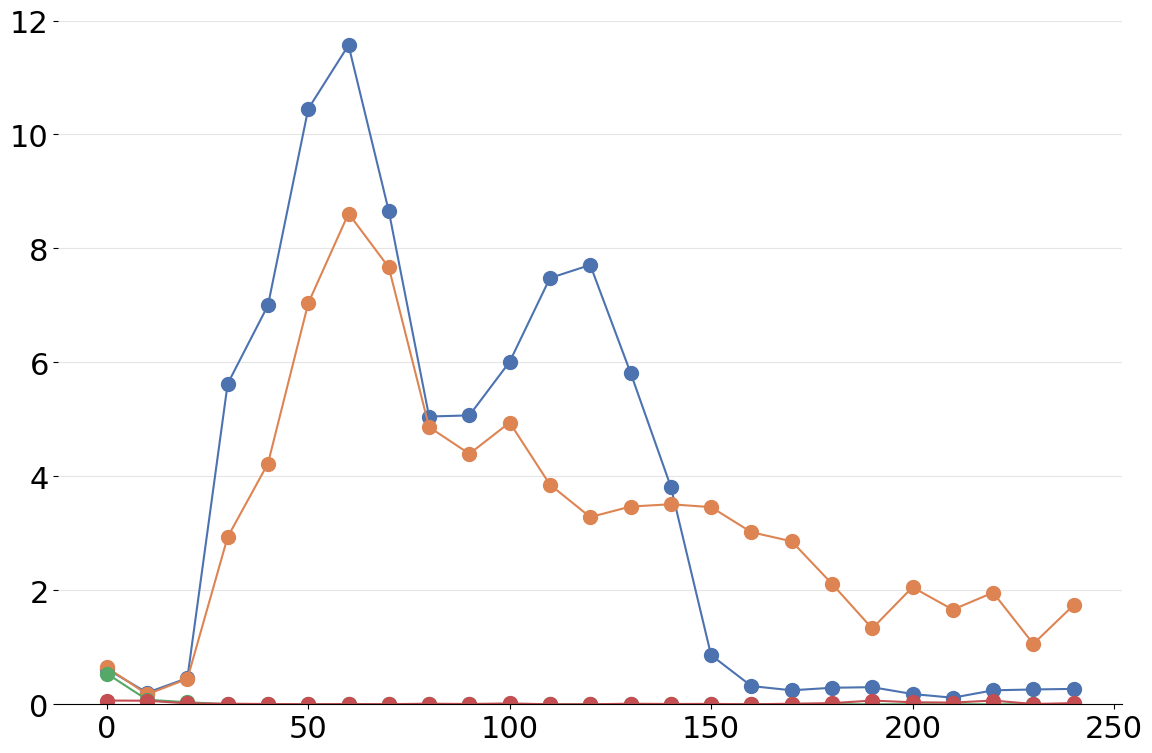

In [273]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
ax.set_ylim(0, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,  # Use different markers for each line
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
        )
# ax.legend()
plt.tight_layout()
plt.show()

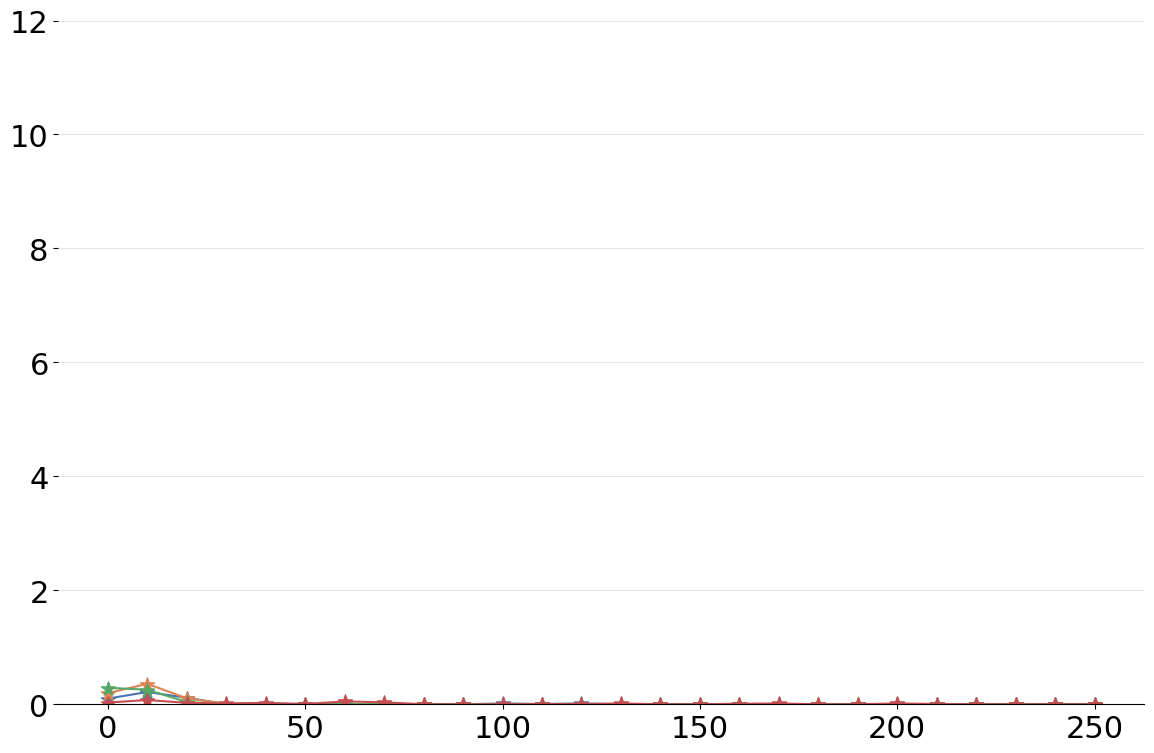

In [274]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
ax.set_ylim(0, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=llama_marker,
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
        )

plt.tight_layout()
plt.show()

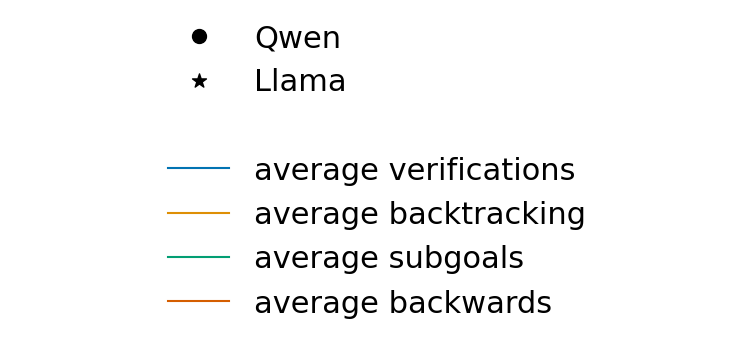

In [275]:
from matplotlib.lines import Line2D
# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(8, 4))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')

# Create legend handles
legend_elements = []

# Add model markers
legend_elements.append(Line2D([0], [0], marker=qwen_marker, color='black',
                            label='Qwen', markersize=10, linestyle='none'))
legend_elements.append(Line2D([0], [0], marker=llama_marker, color='black',
                            label='Llama', markersize=10, linestyle='none'))

# Add separator
legend_elements.append(Line2D([0], [0], color='none', label=''))

# Add measure colors
for phenomenon in phenomena:
    measure = phenomenon.split('_')[-1]
    legend_elements.append(Line2D([0], [0], color=colorblind[phenomena.index(phenomenon)],
                                label=phenomena_to_label[phenomenon]))

# Create the legend
ax_legend.legend(handles=legend_elements, loc='center', ncol=1, frameon=False)
plt.tight_layout()
plt.show()

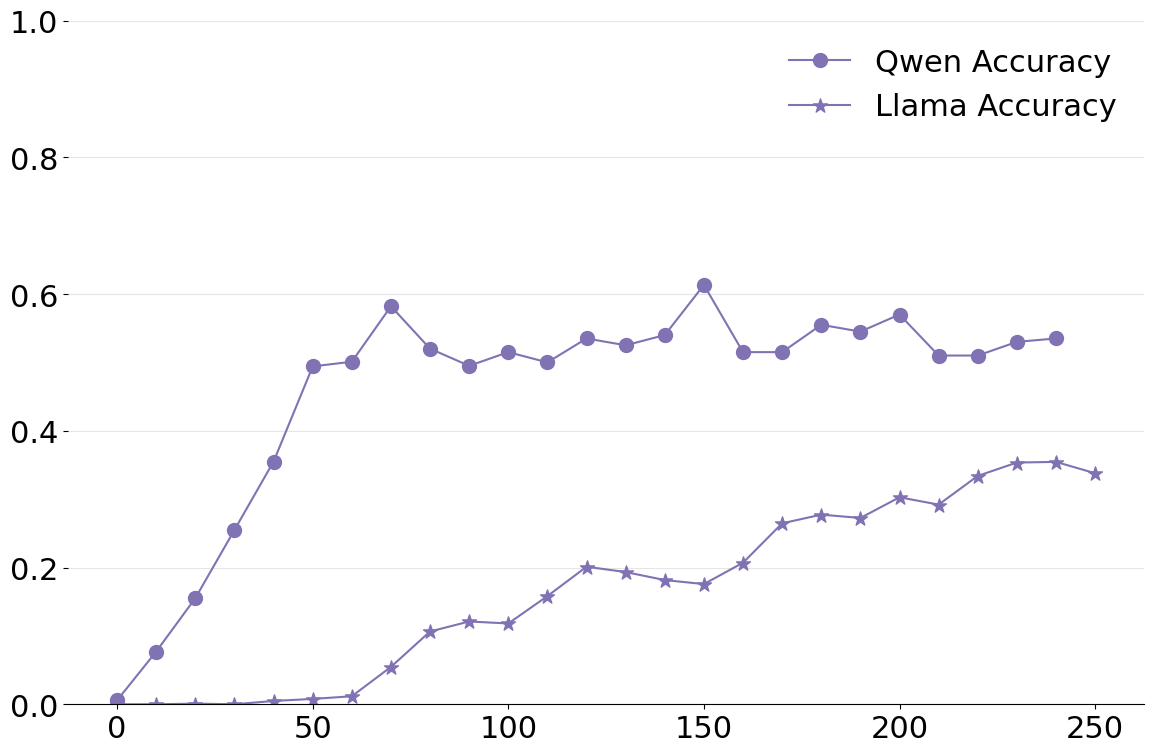

In [276]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
ax.set_ylim(0, 1)


statistics = ["accuracy"]
statistics_to_label = {"accuracy": "Accuracy"}

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,
            markersize=10,
            label=f"Qwen {statistics_to_label[phenomenon]}",
            color=deep[4],
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"Llama {statistics_to_label[phenomenon]}",
            color=deep[4],
        )


ax.legend(frameon=False)
plt.tight_layout()
plt.show()

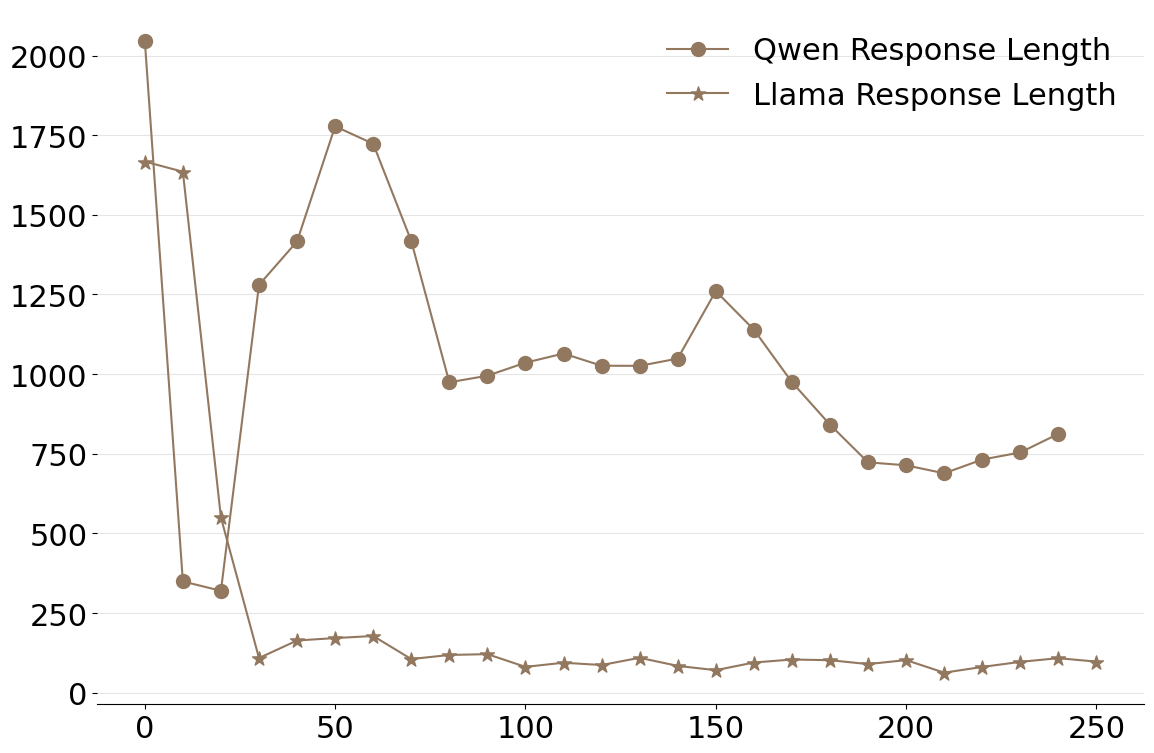

In [277]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

statistics = ["response_length"]
statistics_to_label = {"response_length": "Response Length"}

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,
            markersize=10,
            label=f"Qwen {statistics_to_label[phenomenon]}",
            color=deep[5],
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"Llama {statistics_to_label[phenomenon]}",
            color=deep[5],
        )
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

# Warm Start SFT + RL effects

In [278]:
conditions = ['base_ppo', 'only_backtracking', 'backtracking_subgoal', 'backtracking_verification', 'backtracking_backward', 'all_strategies']

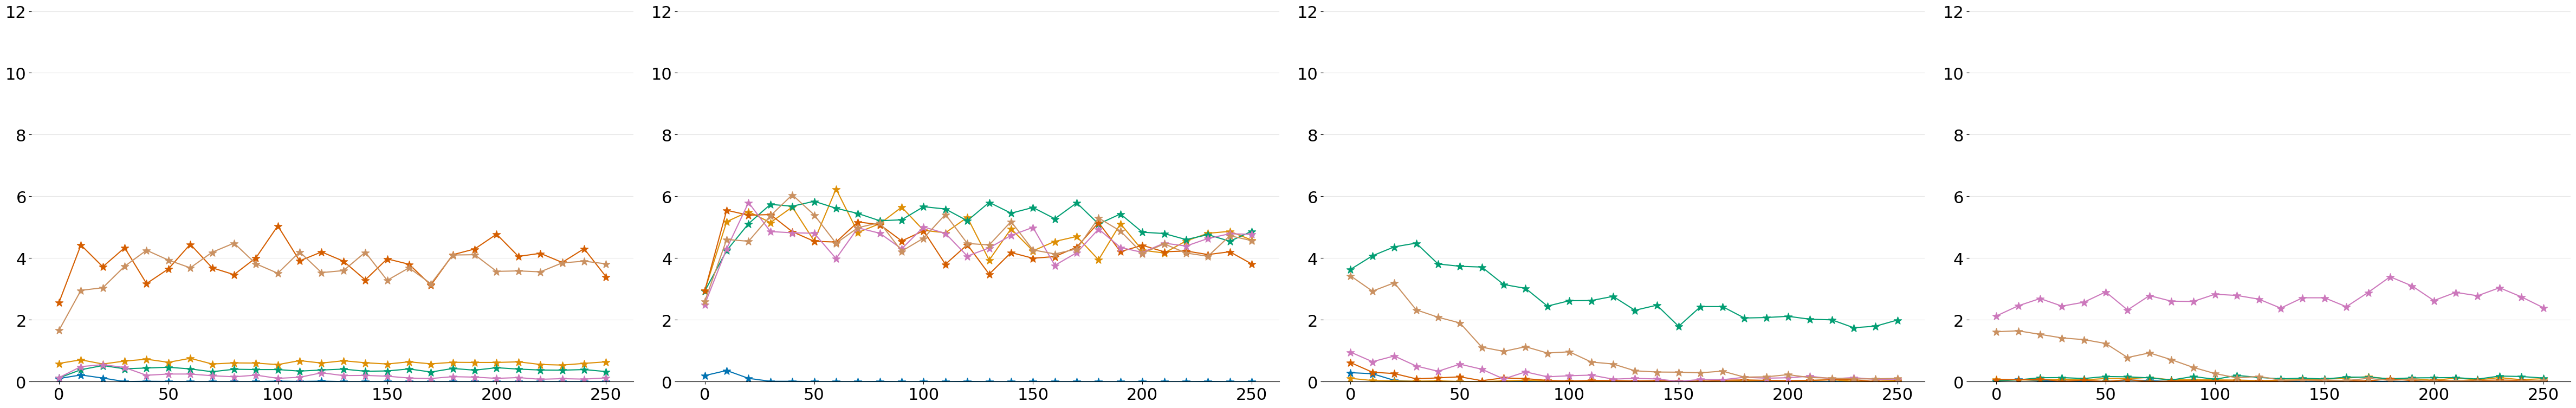

In [279]:
fig, axs = plt.subplots(1, 4, figsize=(48, 8))


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(0, 12)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"{condition}",
            color=colorblind[condition_idx],
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

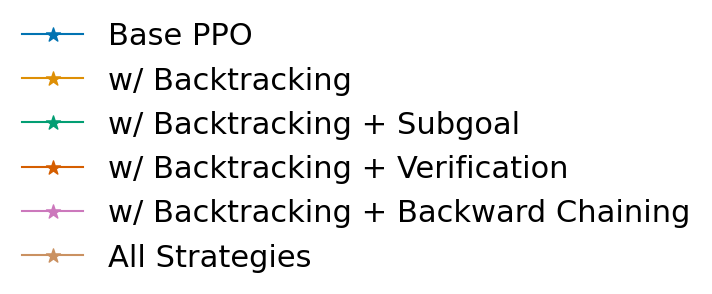

In [280]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []
labels = ['Base PPO', 'w/ Backtracking', 'w/ Backtracking + Subgoal', 
          'w/ Backtracking + Verification', 'w/ Backtracking + Backward Chaining', 'All Strategies']

for label in labels:
    line = plt.Line2D([0], [0], 
                      color=colorblind[labels.index(label)],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=colorblind[labels.index(label)])
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels, 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

# Behavioral evaluation of all-wrong SFT data

In [281]:
conditions = ["no_positive_all_strategies", "all_strategies", "base_ppo"]
colors = {
    'no_positive_all_strategies': colorblind[5],
    'all_strategies': colorblind[4],
    'base_ppo': colorblind[0],
}

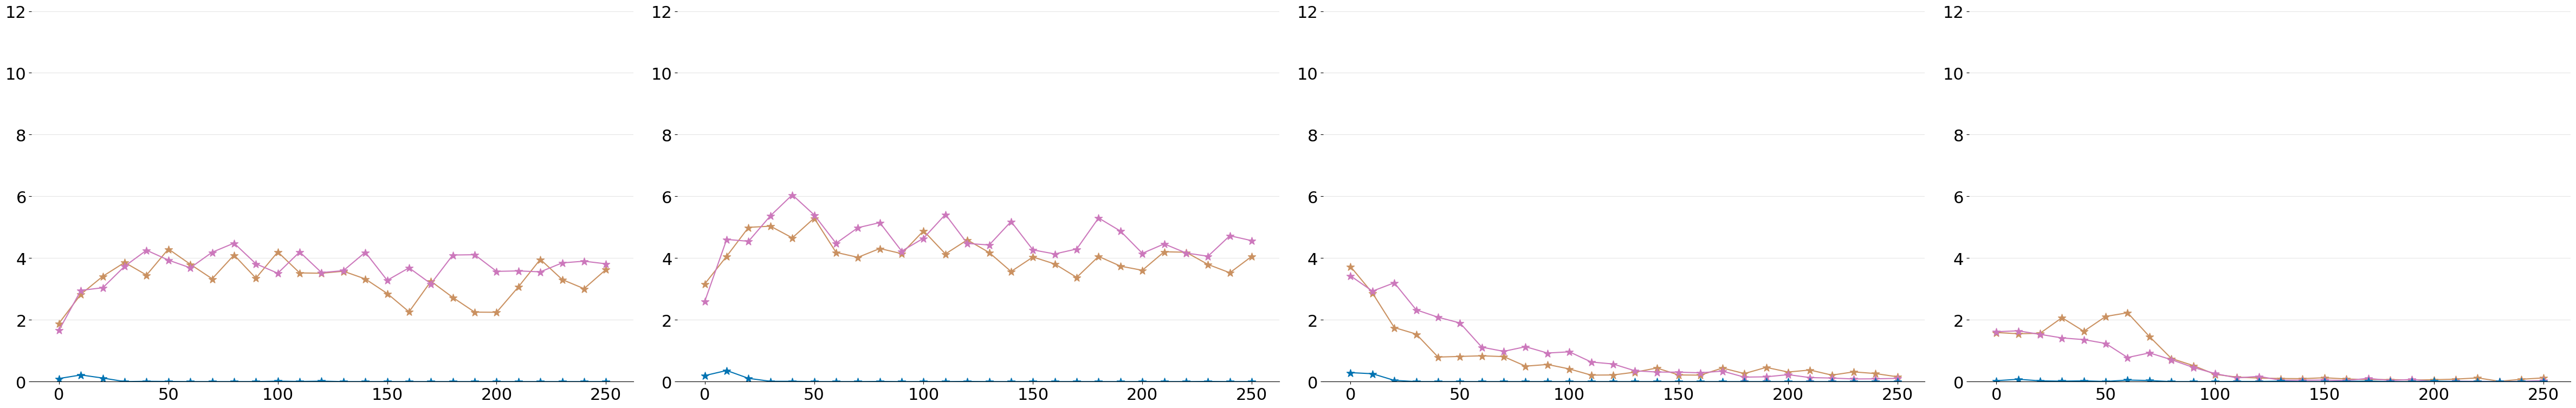

In [282]:
fig, axs = plt.subplots(1, 4, figsize=(48, 8))


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(0, 12)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            color=colors[condition],
            label=f"{condition}",
        )
    
plt.tight_layout()
plt.show()

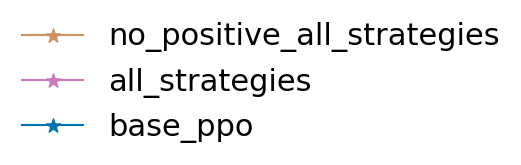

In [283]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []

labels = {
    'no_positive_all_strategies': 'No Positive All Strategies',
    'all_strategies': 'All Strategies',
    'base_ppo': 'Base PPO',
}

for condition, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=colors[condition],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=colors[condition])
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels, 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

# Success Rates Bar Plot

### maybe this should be a line plot instead of a bar plot?

In [260]:
conditions = ['base_ppo', 'all_strategies', 'dots', 'empty_cot']
metrics = ['accuracy']

## If we want both qwen and llama

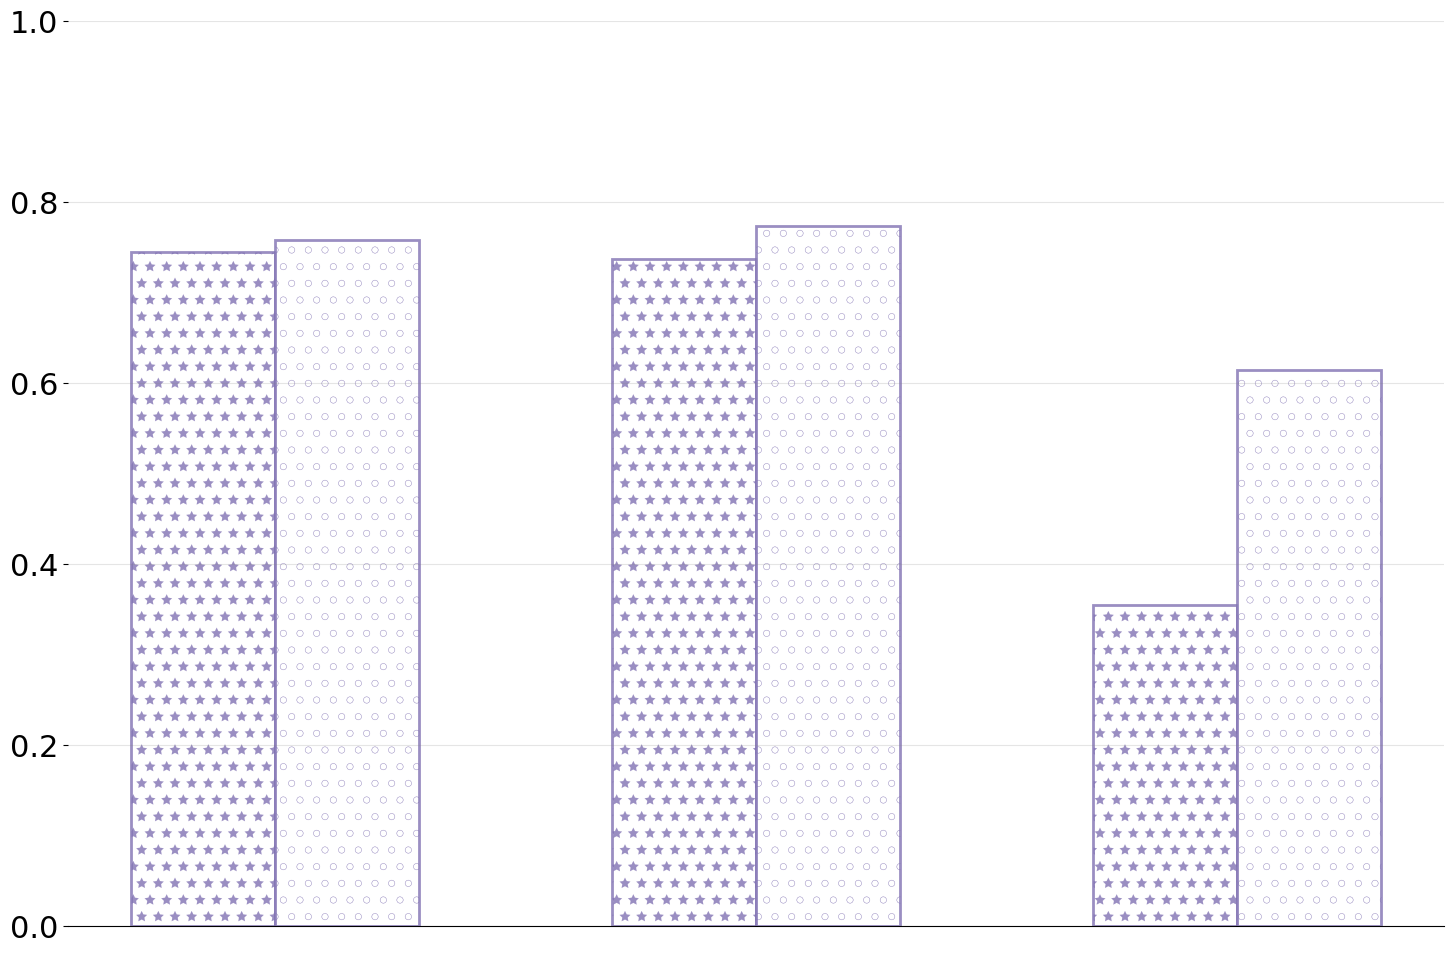

In [284]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.1

# Calculate max accuracies for each condition from both dataframes
max_accuracies_llama = []
max_accuracies_qwen = []
for condition in conditions:
    data_llama = df_llama[df_llama['condition'] == condition]['accuracy']
    data_qwen = df_qwen[df_qwen['condition'] == condition]['accuracy']
    max_accuracies_llama.append(data_llama.max())
    max_accuracies_qwen.append(data_qwen.max())

fig, ax = plt.subplots(figsize=(15, 10))
n_conditions = len(conditions)
# Set positions for each condition group on the x-axis
x = np.arange(n_conditions) * 0.5  
width = 0.15  # Bar width

# Create a list of colors (one per condition) from the predefined 'colorblind' palette
colors = [deep[4] for _ in range(n_conditions)]

# Plot bars for LLaMA (left) and Qwen (right) with white fill
bars_llama = ax.bar(x - width/2, max_accuracies_llama, width=width,
                    facecolor='white', alpha=0.8)
bars_qwen = ax.bar(x + width/2, max_accuracies_qwen, width=width,
                   facecolor='white', alpha=0.8)

# Set hatch patterns and edge colors for each bar according to condition
for i, bar in enumerate(bars_llama):
    bar.set_hatch('*')
    bar.set_edgecolor(colors[i])
    bar.set_linewidth(2)
for i, bar in enumerate(bars_qwen):
    bar.set_hatch('o')
    bar.set_edgecolor(colors[i])
    bar.set_linewidth(2)

ax.set_xticks([])
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
ax.set_ylim(0, 1.)
ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

plt.tight_layout()
plt.show()


## If we want only llama

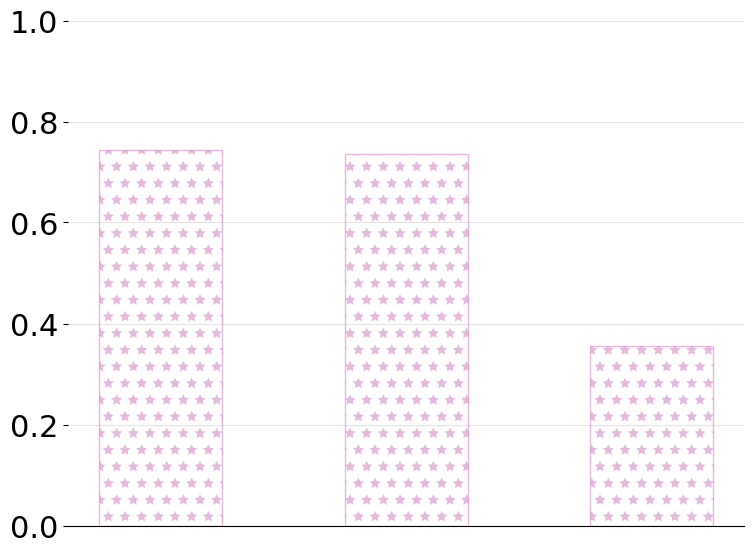

In [285]:
import matplotlib as mpl
# Increase hatch line width to make the hatch pattern appear larger
mpl.rcParams['hatch.linewidth'] = 0.1

max_accuracies = []
for condition in conditions:
    data = df_llama[df_llama['condition'] == condition]['accuracy']
    max_accuracies.append(data.max())

fig, ax = plt.subplots(figsize=(8, 6))
# Reduce spacing between bars by scaling the x positions and lowering the bar width
x = np.arange(len(conditions)) * 0.4  
bars = ax.bar(x, max_accuracies, color='none', edgecolor=colorblind[4], width=0.2)

# Add sparser hatching patterns and set hatch transparency
for idx, bar in enumerate(bars):
    bar.set_hatch('*')  # Space makes the hatch pattern sparser
    bar.set_alpha(0.5)

# Customize plot
ax.set_xticks([])
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
ax.set_ylim(0, 1.)
ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

plt.tight_layout()
plt.show()


# Inherent abilities in the Base models

In [286]:
df_qwen_base = df_qwen[df_qwen['condition'] == 'base_ppo']
df_llama3b_base = df_llama[df_llama['condition'] == 'base_ppo']
df_llama70b_base = df_llama[df_llama['condition'] == 'base_70b']

In [287]:
df_llama3b_base = df_llama3b_base[df_llama3b_base['step'] == 0]
df_qwen_base = df_qwen_base[df_qwen_base['step'] == 0]

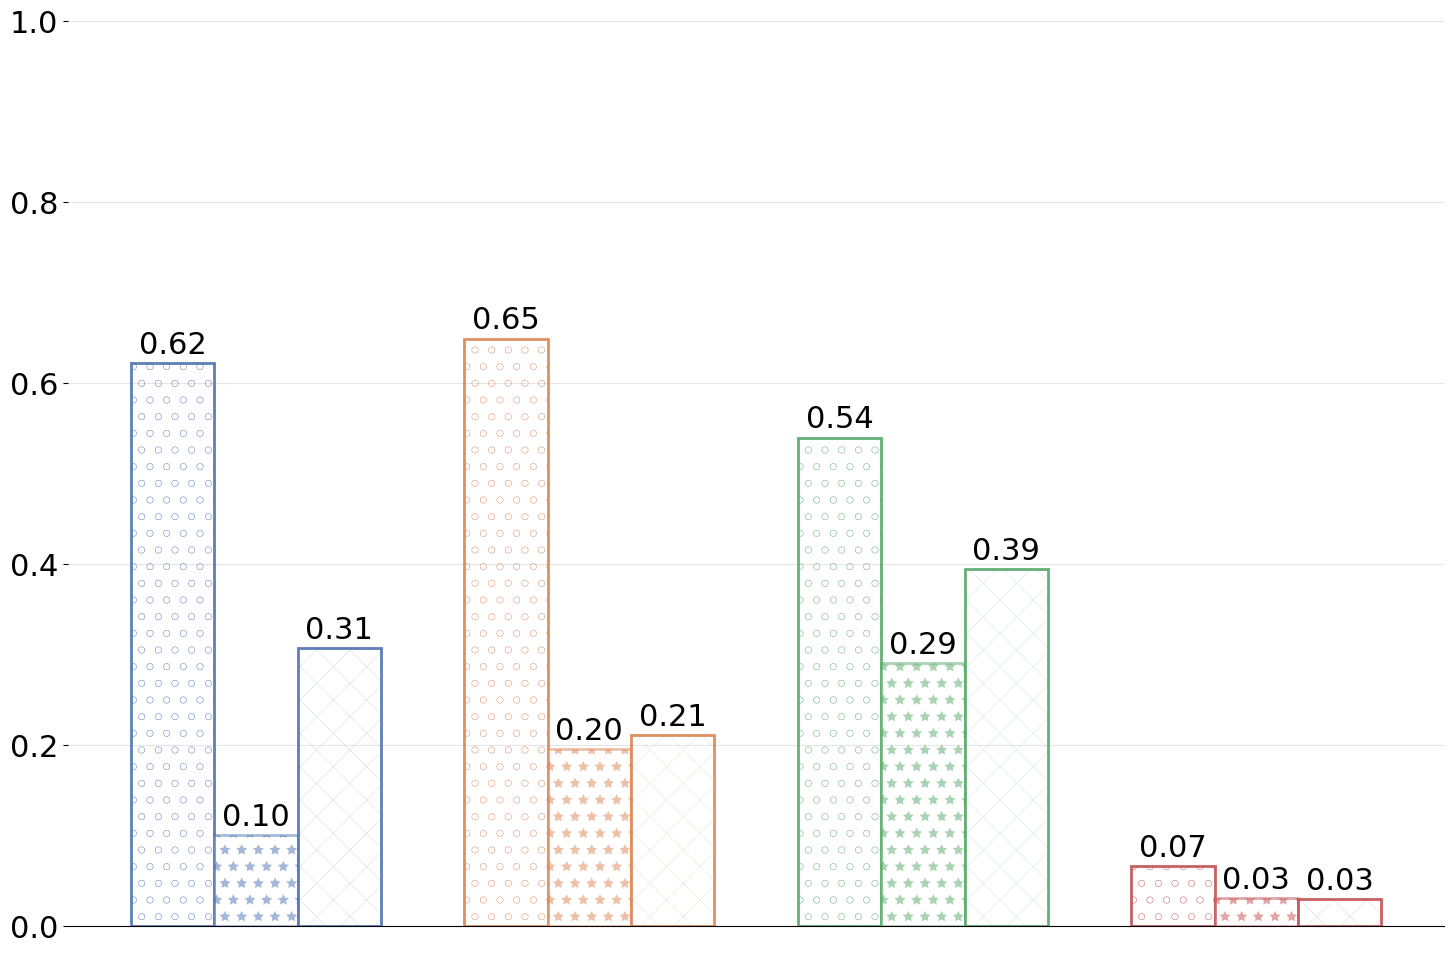

In [288]:
metrics = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']

qwen = [df_qwen_base[metric].max() for metric in metrics]
llama3b = [df_llama3b_base[metric].max() for metric in metrics]
llama70b = [df_llama70b_base[metric].max() for metric in metrics]

x = np.arange(len(metrics))
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 10))

# Define colors for each metric from the predefined "colorblind" list
colors = [deep[i] for i in range(len(metrics))]

# Qwen Base bars: white fill with colored edges and hatch pattern 'o'
rects1 = ax.bar(x - width, qwen, width, label='Qwen Base', alpha=0.9, facecolor='white', hatch='o')
for i, rect in enumerate(rects1):
    rect.set_edgecolor(colors[i])
    rect.set_linewidth(2)

# LLaMA 3B Base bars: white fill with colored edges and hatch pattern 'x'
rects2 = ax.bar(x, llama3b, width, label='Llama 3B Base', alpha=0.5, facecolor='white', hatch='*')
for i, rect in enumerate(rects2):
    rect.set_edgecolor(colors[i])
    rect.set_linewidth(2)

# LLaMA 70B Base bars: white fill with colored edges and hatch pattern 'X'
rects3 = ax.bar(x + width, llama70b, width, label='Llama 70B Base', alpha=0.9, facecolor='white', hatch='X')
for i, rect in enumerate(rects3):
    rect.set_edgecolor(colors[i])
    rect.set_linewidth(2)

# Customize plot
ax.set_xticks([])
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
ax.set_ylim(0, 1.)
ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()


## Human CoT comparison

In [291]:
conditions = ['base_ppo', 'all_strategies', 'human_cot', 'empty_cot']
colors = {
    'base_ppo': colorblind[0],
    'all_strategies': colorblind[4],
    'human_cot': colorblind[5],
    'empty_cot': colorblind[6],
}

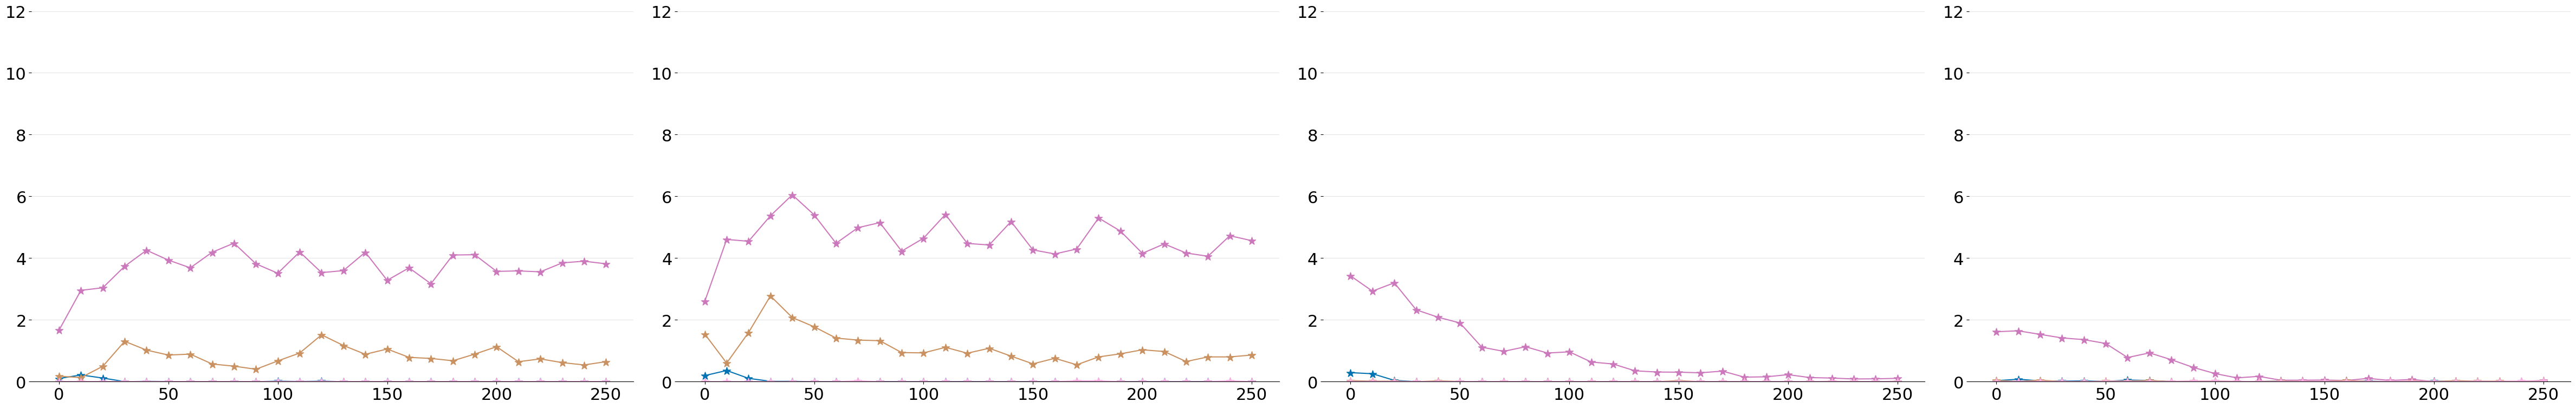

In [292]:
fig, axs = plt.subplots(1, 4, figsize=(48, 8))


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(0, 12)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"{condition}",
            color=colors[condition],
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

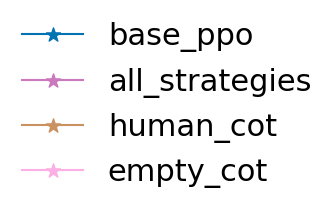

In [293]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []
labels = ['Base PPO', 'All Strategies', 'Human CoT', 'Empty CoT'] 
labels = {
    'base_ppo': 'Base PPO',
    'all_strategies': 'All Strategies',
    'human_cot': 'Human CoT',
    'empty_cot': 'Empty CoT',
}

for label in labels:
    line = plt.Line2D([0], [0], 
                      color=colors[label],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=colors[label])
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels, 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

# Accuracy Length Correlation

In [1]:
import json
from behavioral_evals.acc_resp import compute_metrics
from transformers import AutoTokenizer
from scipy.stats import pearsonr

/scr/akchak/conda/envs/zero/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# get for qwen
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-3B")
qwen_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/base_ppo/completions_step0.jsonl', 'r'))
qwen_scores, qwen_lengths = compute_metrics(qwen_base_completions, tokenizer)

print("step 0")
# pearson correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")


print("step 240")
qwen_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/base_ppo/completions_step240.jsonl', 'r'))
qwen_scores, qwen_lengths = compute_metrics(qwen_base_completions, tokenizer)

# pearson correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

step 0
Pearson correlation coefficient: -0.060 (p-value: 0.054)
Spearman correlation coefficient: -0.060 (p-value: 0.054)
step 240
Pearson correlation coefficient: -0.864 (p-value: 0.000)
Spearman correlation coefficient: -0.864 (p-value: 0.000)


In [3]:
# get for llama
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B")
llama_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/llama_base_ppo/completions_step0.jsonl', 'r'))
llama_scores, llama_lengths = compute_metrics(llama_base_completions, tokenizer)

print("step 0")
# pearson correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

print("step 250")
llama_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/llama_base_ppo/completions_step250.jsonl', 'r'))
llama_scores, llama_lengths = compute_metrics(llama_base_completions, tokenizer)

# pearson correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

step 0
Pearson correlation coefficient: nan (p-value: nan)
Spearman correlation coefficient: nan (p-value: nan)
step 250
Pearson correlation coefficient: -0.060 (p-value: 0.056)
Spearman correlation coefficient: -0.060 (p-value: 0.056)


/tmp/user/23019/ipykernel_954815/1006150401.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
/tmp/user/23019/ipykernel_954815/1006150401.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
